In [ ]:
!pip install matplotlib

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import warnings
import ml.pipeline as pipeline


warnings.simplefilter(action='ignore', category=Warning)
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('data/search_best_params.csv')
df

,days,coef,size_prediction,rmse
0,1,0.1,29,0.015132
1,1,0.2,58,0.026190
2,1,0.3,87,0.062501
3,1,0.4,116,0.040027
4,2,0.1,5,0.029036
5,2,0.2,10,0.020079
6,2,0.3,15,0.022030
7,2,0.4,20,0.032805
8,3,0.1,8,0.038743
9,3,0.2,15,0.018386


In [119]:
best_accuracy = df['rmse'].min()
best_accuracy

0.0151317891942608

In [120]:
best_accuracy_params = df[df['rmse'] == best_accuracy]
best_accuracy_params

,days,coef,size_prediction,rmse
0,1,0.1,29,0.015132


In [121]:
data_best_accuracy_param, rmse_best_accuracy_param, adfuller_best_accuracy_param = pipeline.prediction_week_crypto(
    api_key='test_key',
    ndays=best_accuracy_params['days'].values[0],
    size_coef=best_accuracy_params['coef'].values[0],
)

data_best_accuracy_param

,price,price_prediction_denormal
date,,
2025-02-26 15:21:09,2.29,2.290324
2025-02-26 15:26:45,2.28,2.290479
2025-02-26 15:31:22,2.28,2.290635
2025-02-26 15:36:45,2.28,2.290790
2025-02-26 15:40:44,2.28,2.290946
2025-02-26 15:46:22,2.28,2.291101
2025-02-26 15:51:30,2.28,2.291257
2025-02-26 15:55:59,2.28,2.291412
2025-02-26 16:01:35,2.27,2.291399


<Axes: xlabel='date'>

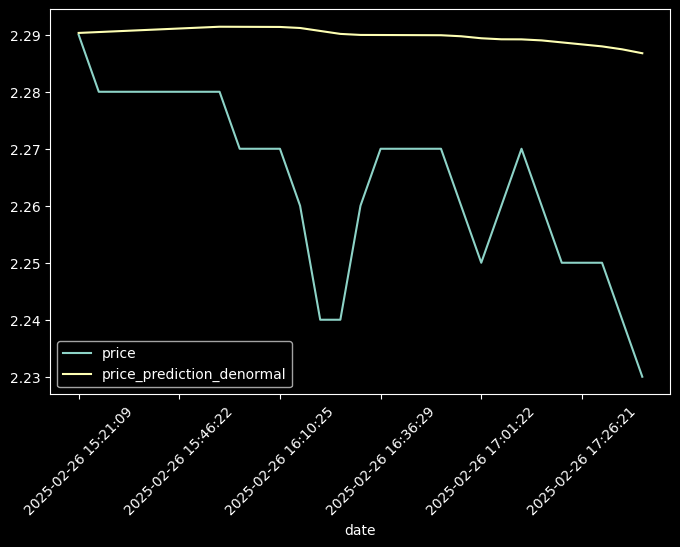

In [122]:
data_best_accuracy_param.plot(
    rot=45,
    figsize=(8, 5),
)

In [123]:
adfuller_best_accuracy_param["rmse"] = rmse_best_accuracy_param
pd.DataFrame(adfuller_best_accuracy_param, index=['adfuller_accuracy'])

,statistic,p_value,critical_1,critical_5,critical_10,rmse
adfuller_accuracy,-14.580235,4.480787e-27,-3.453262,-2.871628,-2.572146,0.029439


In [124]:
df['diff'] = (df['rmse'] - df['days']).abs()
df

,days,coef,size_prediction,rmse,diff
0,1,0.1,29,0.015132,0.984868
1,1,0.2,58,0.026190,0.973810
2,1,0.3,87,0.062501,0.937499
3,1,0.4,116,0.040027,0.959973
4,2,0.1,5,0.029036,1.970964
5,2,0.2,10,0.020079,1.979921
6,2,0.3,15,0.022030,1.977970
7,2,0.4,20,0.032805,1.967195
8,3,0.1,8,0.038743,2.961257
9,3,0.2,15,0.018386,2.981614


In [125]:
best_size_params = df[df['diff'] == df['diff'].min()]
best_size_params

,days,coef,size_prediction,rmse,diff
2,1,0.3,87,0.062501,0.937499


In [126]:
data_best_size_param, rmse_best_size_param, adfuller_best_size_param = pipeline.prediction_week_crypto(
    api_key='test_key',
    ndays=best_size_params['days'].values[0],
    size_coef=best_size_params['coef'].values[0],
)

data_best_size_param

,price,price_prediction_denormal
date,,
2025-02-26 10:32:09,2.30,2.300493
2025-02-26 10:36:17,2.30,2.300987
2025-02-26 10:41:05,2.31,2.301628
2025-02-26 10:46:21,2.31,2.302270
2025-02-26 10:51:25,2.31,2.302912
...,...,...
2025-02-26 17:21:48,2.25,2.298483
2025-02-26 17:26:21,2.25,2.298237
2025-02-26 17:31:44,2.25,2.297991


<Axes: xlabel='date'>

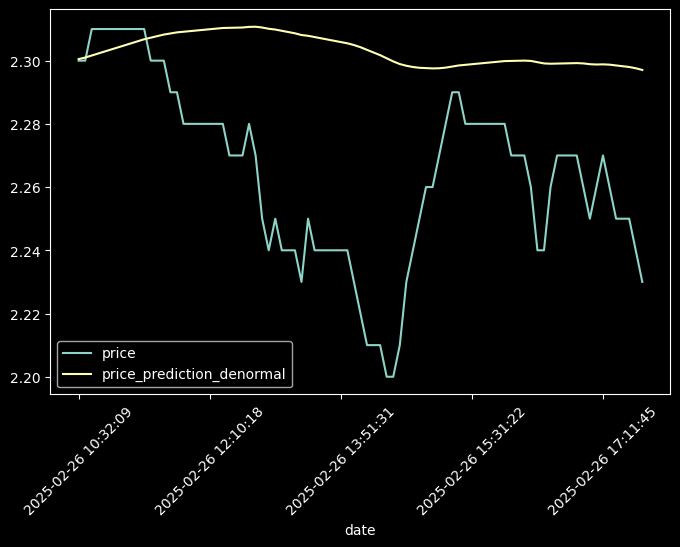

In [127]:
data_best_size_param.plot(
    rot=45,
    figsize=(8, 5),
)

In [128]:
adfuller_best_size_param["rmse"] = rmse_best_size_param
pd.DataFrame(adfuller_best_size_param, index=['adfuller_size'])

,statistic,p_value,critical_1,critical_5,critical_10,rmse
adfuller_size,-14.580235,4.480787e-27,-3.453262,-2.871628,-2.572146,0.047888


Real differeces accuracy between best size+rmse and best rmse

In [129]:
abs(rmse_best_size_param - rmse_best_accuracy_param) / rmse_best_accuracy_param * 100

62.66802051463115

In [130]:
timedelta_size = datetime.strptime(data_best_size_param.index[-1], '%Y-%m-%d %H:%M:%S') - datetime.strptime(data_best_size_param.index[0], '%Y-%m-%d %H:%M:%S')    
str(timedelta_size)

'7:07:45'

In [131]:
timedelta_accuracy = datetime.strptime(data_best_accuracy_param.index[-1], '%Y-%m-%d %H:%M:%S') - datetime.strptime(data_best_accuracy_param.index[0], '%Y-%m-%d %H:%M:%S')    
str(timedelta_accuracy)

'2:18:45'

In [132]:
str(timedelta_size - timedelta_accuracy)

'4:49:00'